In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from fbprophet import Prophet
%matplotlib inline

In [12]:
df = pd.read_csv('Nairobi All Share Historical Data.csv')
df = df[['Date', 'Price']].dropna()

df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')

daily_df = df.resample('D').mean()
d_df = daily_df.reset_index().dropna()


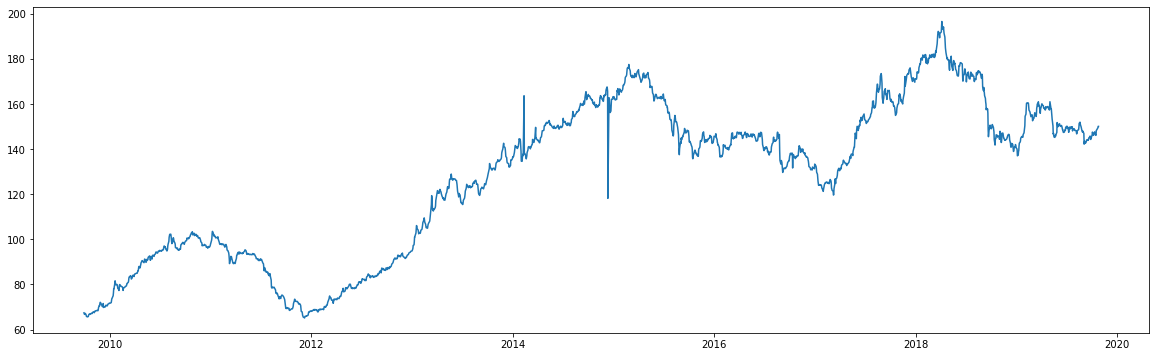

In [13]:
d_df.columns = ['ds', 'y']
fig = plt.figure(facecolor='w', figsize =(20, 6))
plt.plot(d_df.ds, d_df.y)

In [17]:
#Prophet Model Training
m = Prophet(daily_seasonality=True)
m.fit(d_df)

future = m.make_future_dataframe(periods=90)
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper',]].tail()

,ds,yhat,yhat_lower,yhat_upper
2589,2020-01-19,134.003565,126.654143,140.559692
2590,2020-01-20,137.264047,130.204549,144.115887
2591,2020-01-21,137.251581,130.406689,143.818400
2592,2020-01-22,137.374987,130.650195,144.491313
2593,2020-01-23,137.211792,130.273144,144.049119


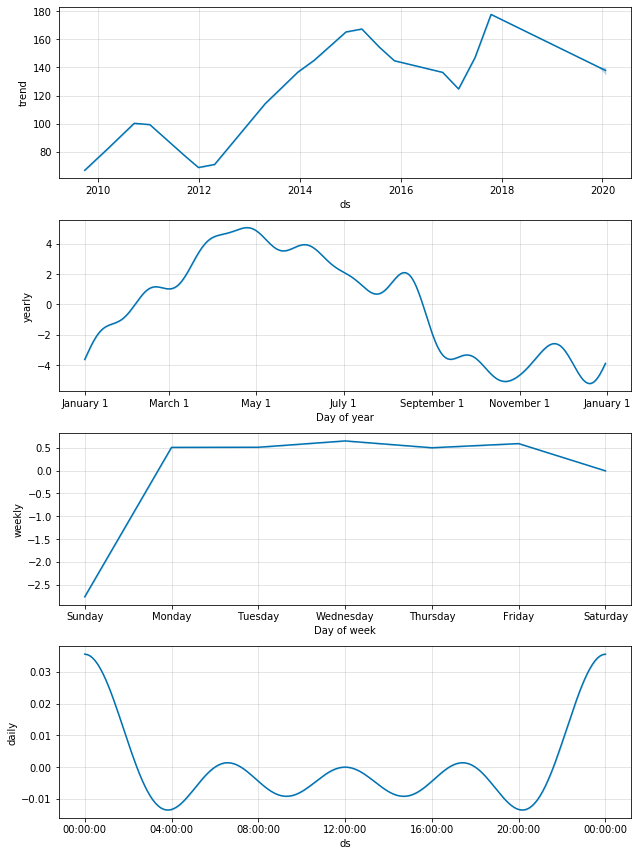

In [21]:
fig = m.plot_components(forecast)

Since this is a financial scenario, trading days are only Monday to Friday. This means predictions should only be made for those days and exclude weekends, since the weekly seasonality will not be well estimated for the weekends. Not sure how to do this yet though :( (Hopefully the model took this into consideration).

ds = forecast date
yhat = forecast value for the given date(Blue Line)
yhat_lower = lower forecast boundary for the given date(light blue)
yhat_uppet = upper forecast boundary for the given date(Light blue)
Black Points = Training Data

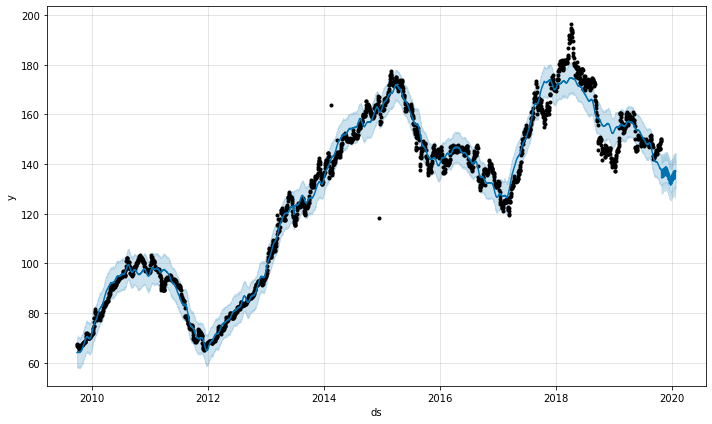

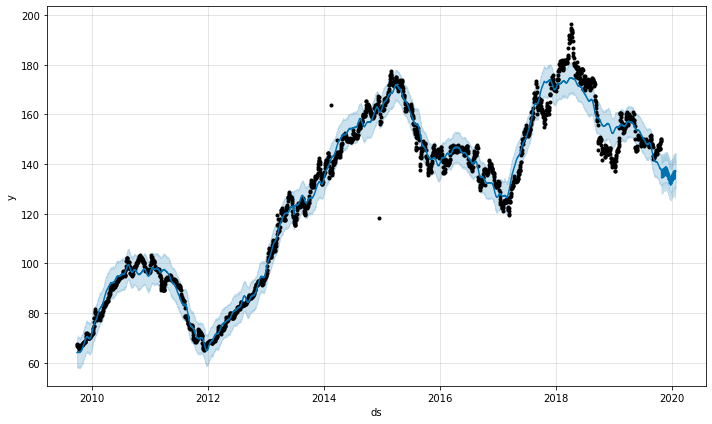

In [24]:
m.plot(forecast)

Visibility is a bit low since the chart is showing all the data. Zooming in to get a more detailed view of the prediction

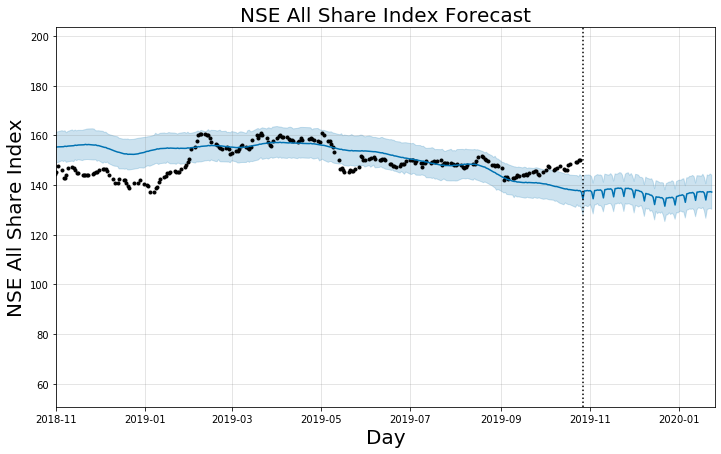

In [25]:
from datetime import datetime, timedelta

fig1 = m.plot(forecast)

#datenow = datetime.now()
datenow = datetime(2019, 10,27)
dateend = datenow + timedelta(days=90)
datestart = dateend - timedelta(days=450)

plt.xlim([datestart, dateend])
plt.title("NSE All Share Index Forecast", fontsize=20)
plt.xlabel("Day", fontsize=20)
plt.ylabel("NSE All Share Index", fontsize=20)
plt.axvline(datenow, color="k", linestyle=":")
plt.show()

In [27]:
#Printing the Forecast Values
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper',]][-90:]

,ds,yhat,yhat_lower,yhat_upper
2504,2019-10-26,137.180240,130.771291,143.637387
2505,2019-10-27,134.409050,128.080639,140.398557
2506,2019-10-28,137.676953,131.593386,143.887255
2507,2019-10-29,137.681596,131.756792,144.047910
2508,2019-10-30,137.829239,131.367081,144.008760
...,...,...,...,...
2589,2020-01-19,134.003565,126.654143,140.559692
2590,2020-01-20,137.264047,130.204549,144.115887
2591,2020-01-21,137.251581,130.406689,143.818400
2592,2020-01-22,137.374987,130.650195,144.491313


Now Let's run a Model Cross Validation (MAPE)

In [28]:
from fbprophet.diagnostics import cross_validation, performance_metrics

In [34]:
df_cv = cross_validation(m, horizon='90 days')
df_p = performance_metrics(df_cv)
df_p.head()

INFO:fbprophet.diagnostics:Making 74 forecasts with cutoffs between 2010-07-29 00:00:00 and 2019-07-27 00:00:00


,horizon,mse,rmse,mae,mape,coverage
2388,9 days,120.104120,10.959203,7.049061,0.048654,0.368653
378,9 days,120.105937,10.959285,7.049471,0.048660,0.368653
2082,9 days,119.764192,10.943683,7.025385,0.048489,0.370861
3678,9 days,120.313084,10.968732,7.052857,0.048642,0.368653
3802,9 days,120.823339,10.991967,7.082229,0.048790,0.366446


from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')

The block of code above outputs an error (TypeError: cannot astype a timedelta from [timedelta64[ns]] to [int32]), not sure if it has been fixed in newer versions. For the meantime I'll try plotting MPAE with pd.Dataframe

In [42]:
pd.DataFrame.plot(df_cv)

In [43]:
import pickle
with open('nse_forecast_model.pckl', 'wb') as fout:
    pickle.dump(m, fout)
    
with open('nse_forecast_model.pckl', 'rb') as fin:
    m2 = pickle.load(fin)